In [1]:
# Tracking a Nonstationary Problem, Exercise 2.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def environment():
    """Returns values and states for 10,000 steps with random walk."""
    values = np.random.normal(size = 10)
    states = []

    for t in range(10000):
        state = np.random.normal(values)
        random_walk = np.random.normal(scale = 0.01, size = 10)
        values = values + random_walk
        states.append(state)

    states = np.array(states)
    return values, states

In [4]:
def agent():
    """Initiates estimated values and action counts."""
    Q = np.zeros(10)
    N = np.zeros(10)
    return Q, N

In [5]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [6]:
def explore(Q):
    """Picks a random action."""
    explore_choice = np.random.choice(np.arange(Q.size))
    return explore_choice

In [7]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'explore']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'explore':
        return explore(Q)

In [8]:
def learn_stationary(Q, A, R, N):
    """Updates value estimate using the sample-average method."""
    N[A] = N[A] + 1
    Q[A] = Q[A] + (R - Q[A]) / N[A]
    return Q, N

In [9]:
def learn_non_stationary(Q, A, R, alpha):
    """Updates value estimate using a constant step-size parameter."""
    Q[A] = Q[A] + (alpha * (R - Q[A]))
    return Q

In [10]:
def run(epsilon, runs, alpha = False):
    """Return average behavior given epsilon, number of runs and alpha."""
    values, states = environment() # start out equal
    avg_rewards_list = []

    for run in range(runs):
        Q, N = agent()

        rewards = 0
        avg_rewards = []

        for t, state in enumerate(states):
            A = epsilon_greedy(Q, epsilon)
            R = state[A]
            if alpha:
                Q = learn_non_stationary(Q, A, R, alpha)
            else:
                Q, N = learn_stationary(Q, A, R, N)

            rewards = rewards + R
            avg_reward = rewards / (t + 1)
            avg_rewards.append(avg_reward)

        avg_rewards_list.append(avg_rewards)

    avg_rewards_arr = np.array(avg_rewards_list)
    avg_behavior = avg_rewards_arr.sum(axis = 0) / runs
    return avg_behavior

In [11]:
# running for epsilon = 0.01

runs = 2000

first = run(0.01, runs); print('First run complete.')
second = run(0.01, runs, alpha = 0.1); print('Second run complete.') # constant step-size

First run complete.
Second run complete.


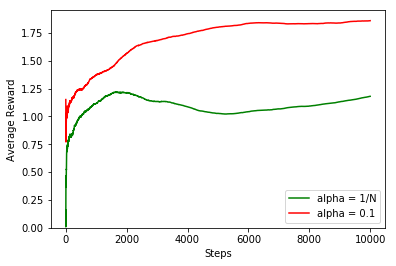

In [12]:
# plotting the results

plt.plot(first, color = 'green', label = 'alpha = 1/N')
plt.plot(second, color = 'red', label = 'alpha = 0.1') # constant step-size
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.ylim(bottom = 0)
plt.legend()

plt.show()